In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
## Generating simple dataset
# np.random.seed(42)

# num_samples = 500
# height = np.random.normal(170, 10, num_samples).astype(int)
# ## Linearly related data as one unit of increase in height lead to weight increased by 0.5 units avg
# weight = (0.5 * height + np.random.normal(0, 5, num_samples)).astype(int)

# df = pd.DataFrame({
#     'weight': weight,
#     'height': height
# })

# df.to_csv('height-weight.csv', index=False)

# print("Dataset stored!!")

In [3]:
df = pd.read_csv('Height Weight Data.csv')

In [4]:
## SLR
df.head()

,weight,height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

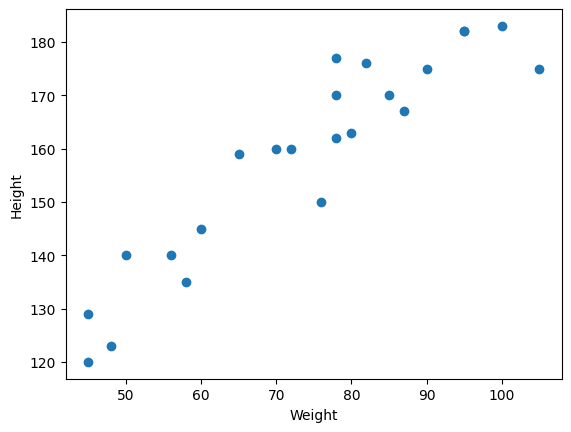

In [5]:
plt.scatter(df['weight'], df['height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [6]:
df.corr()

,weight,height
weight,1.000000,0.931142
height,0.931142,1.000000


In [7]:
import seaborn as sns

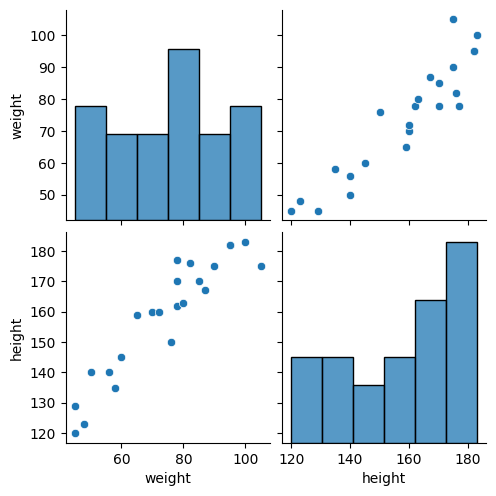

In [8]:
sns.pairplot(df)

In [9]:
df.head()

,weight,height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [10]:
## Independent and Dependent features
X=df[['weight']] ## independent feature should be a Df or 2d-Array
X.head()

,weight
0,45
1,58
2,48
3,60
4,70


In [11]:
y=df['height'] ## dependent features can be a series or 1d-Array
y

,height
0,120
1,135
2,123
3,145
4,160
5,162
6,163
7,175
8,182
9,170


In [12]:
## Train Test Split
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_Test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)

In [14]:
X_train.shape

(17, 1)

In [15]:
y_train.shape

(17,)

In [16]:
## Standardization
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)

In [19]:
X_Test = scaler.transform(X_Test)

In [20]:
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [21]:
regressor = LinearRegression(n_jobs=-1)

In [22]:
regressor.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [23]:
print("Coefficient ",regressor.coef_)

Coefficient  [17.2982057]


In [24]:
print("Intercept ",regressor.intercept_)

Intercept  156.47058823529412


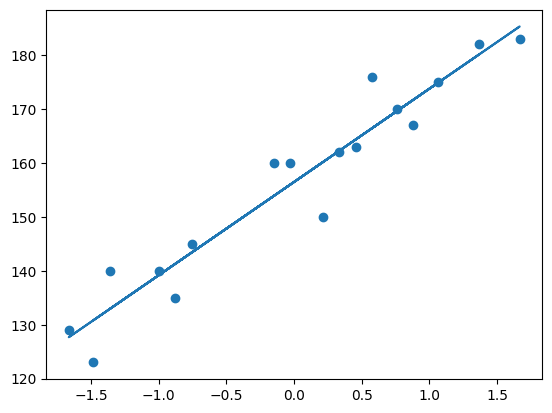

In [25]:
## Plot: Best fit line for training data
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train))

### Prediction of test data
1. predicted height opt = intercept + coef (Weights)

In [26]:
## Prediction for test data
y_pred=regressor.predict(X_Test)

In [27]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [28]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [29]:
print("MSE ",mse)
print("MAE ",mae)
print("RMSE ",rmse)

MSE  114.84069295228699
MAE  9.66512588679501
RMSE  10.716374991212605


#### R Square
R^2 = 1 - SSR/SST

SSR = Sum of square of residuals
SST = total sum of square

In [30]:
from sklearn.metrics import r2_score

In [31]:
r2_score = r2_score(y_test,y_pred)

In [32]:
print("R2 score ",r2_score)

R2 score  0.7360826717981276


#### Adjusted R2 = 1 - [(1-R2)*(n-1)/(n-k-1)]

n = number of observations
k = the number of predictor variables

In [33]:
1 - (1-r2_score) * (len(y_test)-1) / (len(y_test)-X_Test.shape[1]-1)

0.6701033397476595

### OLS Linear Regression

In [34]:
import statsmodels.api as sm

In [35]:
ols_model = sm.OLS(y_train,X_train).fit()

In [36]:
pred = ols_model.predict(X_Test)

In [37]:
print(ols_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Mon, 11 Nov 2024   Prob (F-statistic):                       0.664
Time:                        18:07:52   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [39]:
## Pred for new data
new_data = scaler.transform([[72]])
regressor.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])